In [11]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.optim as optim
from tqdm import tqdm  # For progress bar
import matplotlib.pyplot as plt
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T  # Importing transforms with alias 'T'
from torchvision.ops import box_iou
import os
import random

# Load the pre-trained Faster R-CNN model

import matplotlib.pyplot as plt
import matplotlib.patches as patches

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)

# Adjust the model to have 4 classes: ['background', 'text', 'table', 'image']
num_classes = 4  # ['background', 'text', 'table', 'image']
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)



model_path = '/kaggle/input/fastercnn-3/pytorch/default/1/best_model (1).pth'  # Replace with your model path
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
    print("Loaded pre-trained model successfully.")
    
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()  # Set to evaluation mode

# Define the image transform
transform = T.Compose([
    T.ToTensor()
])


/tmp/ipykernel_30/1488071088.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda

Loaded pre-trained model successfully.


Selected 10 images for inference: ['PMC4814692_00003.jpg', 'PMC4913748_00007.jpg', 'PMC4784494_00009.jpg', 'PMC4053939_00002.jpg', 'PMC4106203_00000.jpg', 'PMC5968860_00000.jpg', 'PMC5796366_00002.jpg', 'PMC5843071_00004.jpg', 'PMC4415963_00000.jpg', 'PMC5804043_00004.jpg', 'PMC3444042_00002.jpg', 'PMC4088335_00002.jpg', 'PMC4972859_00002.jpg', 'PMC3263843_00002.jpg', 'PMC6011829_00023.jpg', 'PMC5036584_00000.jpg', 'PMC3431077_00000.jpg', 'PMC3491371_00001.jpg', 'PMC5491564_00006.jpg', 'PMC5906808_00001.jpg']


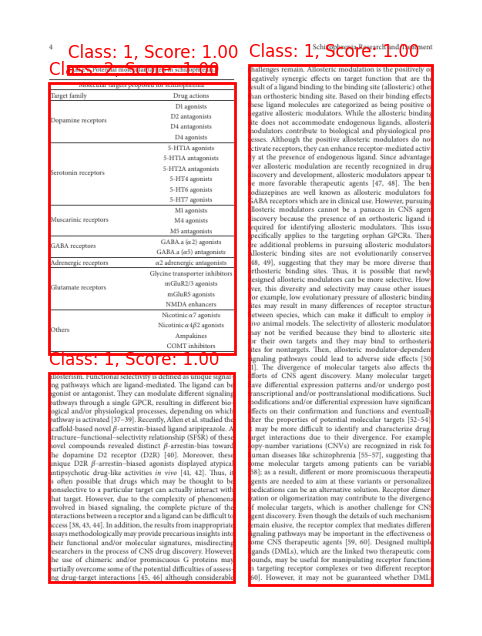

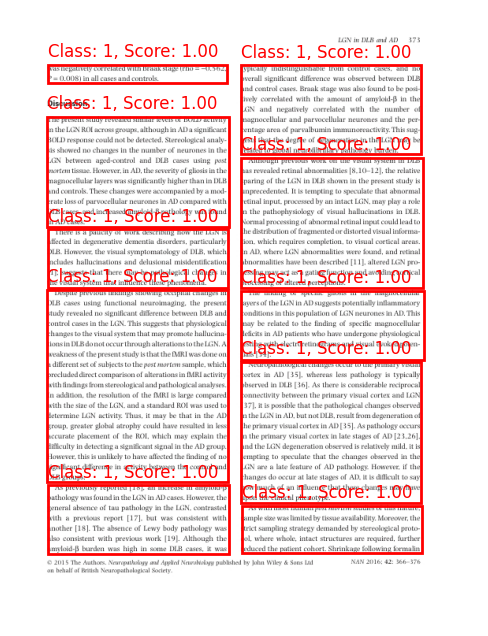

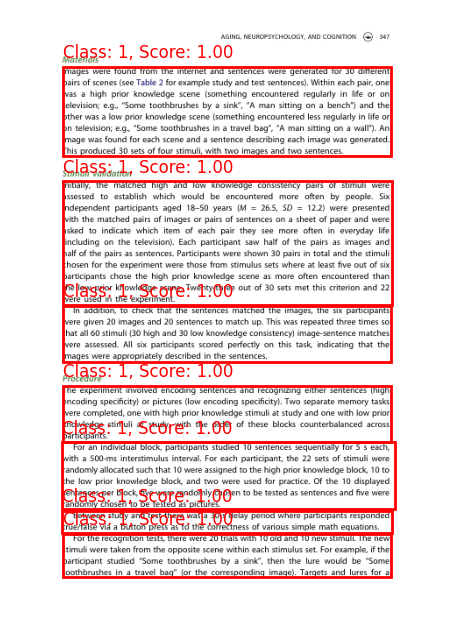

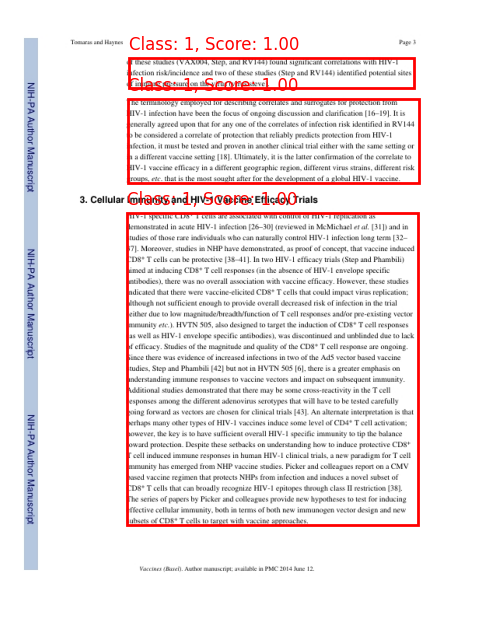

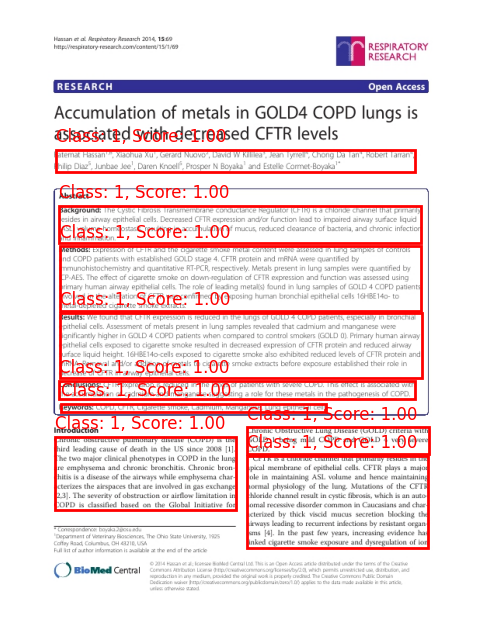

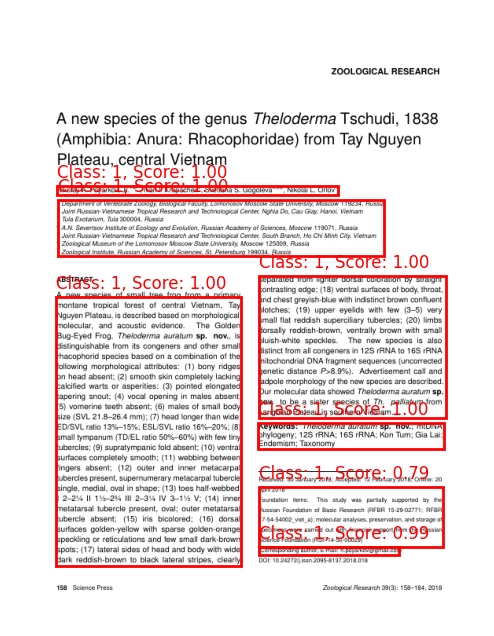

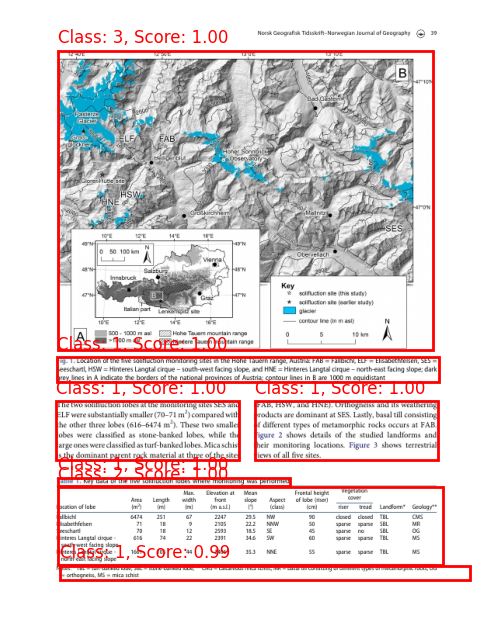

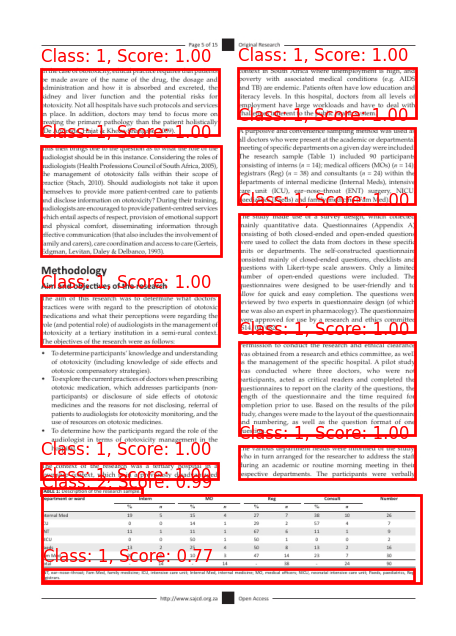

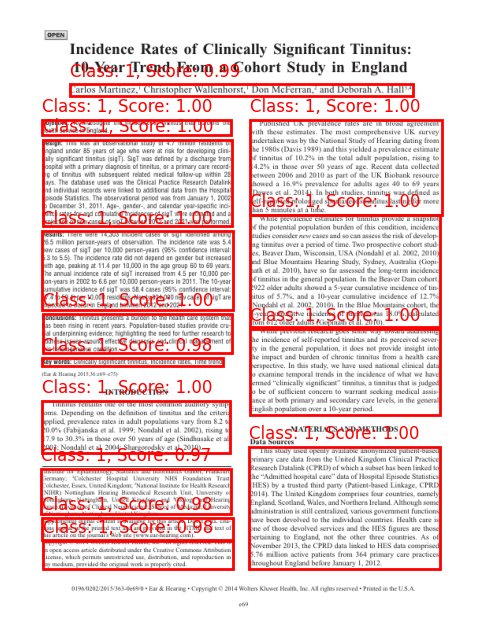

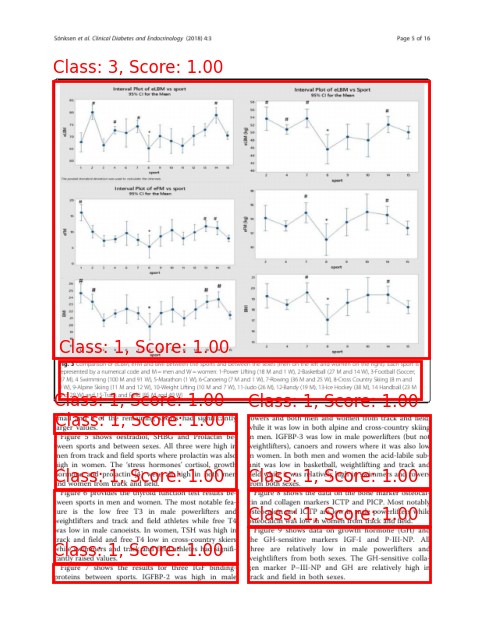

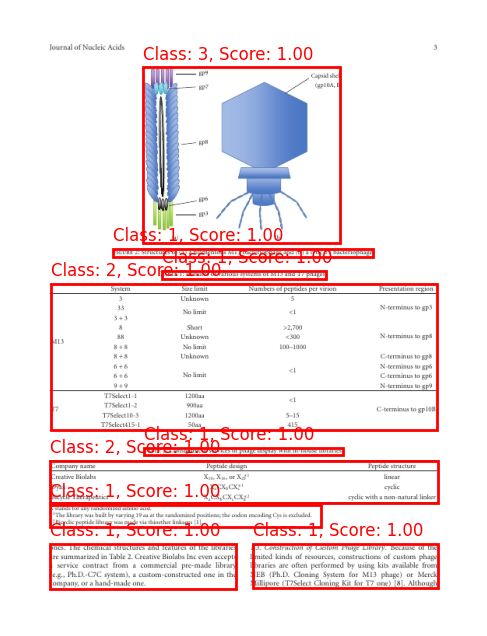

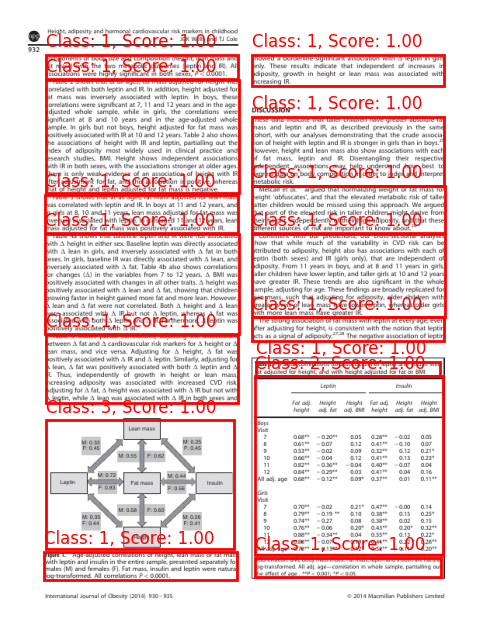

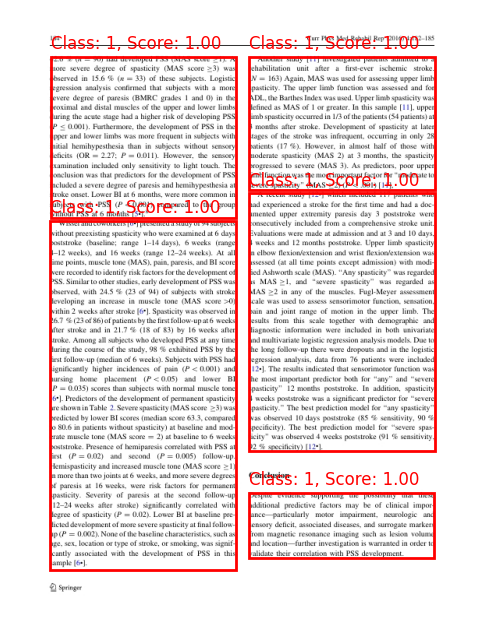

In [ ]:
# Define the image transform
transform = T.Compose([
    T.ToTensor()
])
from PIL import Image  # Importing Image from PIL library
# Directory path for test images
test_images_dir = '/kaggle/input/final-train/train_8000_images/'  # Replace with your test images directory

# Load all test images from the directory
test_images = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 10 test images from the list
random.seed(42)  # Set seed for reproducibility
selected_images = random.sample(test_images, 20)

print(f"Selected 10 images for inference: {selected_images}")

def visualize_predictions(image, predictions):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    # Draw bounding boxes
    for box, label, score in zip(predictions['boxes'], predictions['labels'], predictions['scores']):
        if score >= 0.5:  # Display boxes with a confidence threshold of 0.5
            xmin, ymin, xmax, ymax = box
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin-10, f"Class: {label.item()}, Score: {score:.2f}", color='red', fontsize=12)

    plt.axis('off')
    plt.show()

# Inference on the selected test images
for test_image_name in selected_images:
    test_image_path = os.path.join(test_images_dir, test_image_name)

    # Load and preprocess the image
    image = Image.open(test_image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Run inference
    with torch.no_grad():
        outputs = model(image_tensor)[0]

    # Visualize the results
    visualize_predictions(image, outputs)
